In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from pylab import rcParams
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

### Q1: Read the data as an appropriate Time Series data and plot the data.

In [3]:
df = pd.read_csv('Rose.csv',parse_dates =True, index_col=0)
df.head()

,Rose
YearMonth,
1980-01-01,112.0
1980-02-01,118.0
1980-03-01,129.0
1980-04-01,99.0
1980-05-01,116.0


In [4]:
df.index

DatetimeIndex(['1980-01-01', '1980-02-01', '1980-03-01', '1980-04-01',
               '1980-05-01', '1980-06-01', '1980-07-01', '1980-08-01',
               '1980-09-01', '1980-10-01',
               ...
               '1994-10-01', '1994-11-01', '1994-12-01', '1995-01-01',
               '1995-02-01', '1995-03-01', '1995-04-01', '1995-05-01',
               '1995-06-01', '1995-07-01'],
              dtype='datetime64[ns]', name='YearMonth', length=187, freq=None)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-01 to 1995-07-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rose    185 non-null    float64
dtypes: float64(1)
memory usage: 2.9 KB


In [31]:
print("The number of rows: ",df.shape[0], "\n""The number of columns: ",df.shape[1])

The number of rows:  187 
The number of columns:  1


In [5]:
df.tail(15)

,Rose
YearMonth,
1994-05-01,44.0
1994-06-01,45.0
1994-07-01,NaN
1994-08-01,NaN
1994-09-01,46.0
1994-10-01,51.0
1994-11-01,63.0
1994-12-01,84.0
1995-01-01,30.0


**Plotting the Time Series to understand the behaviour of the data.**

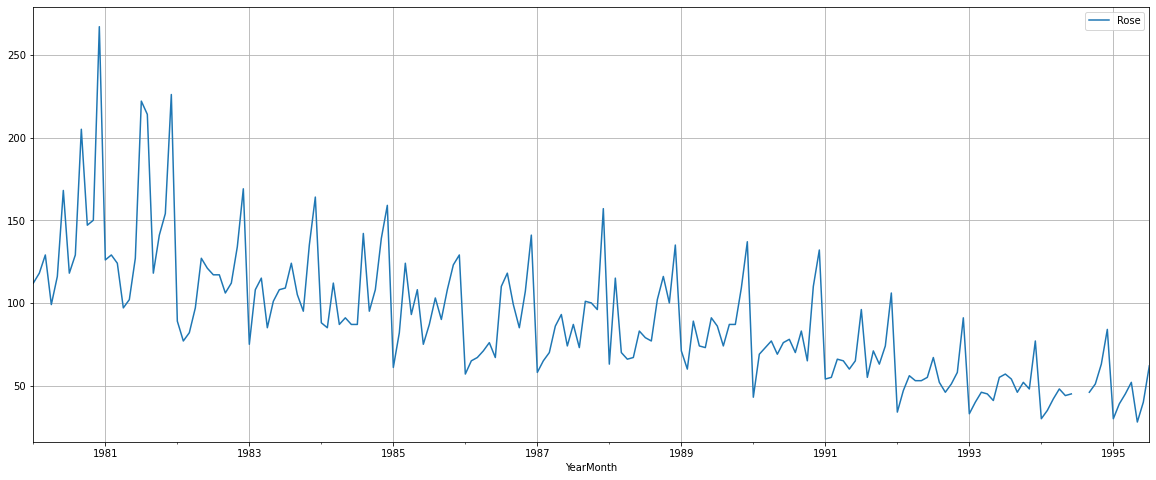

In [9]:
df.plot(figsize=(20,8), grid =True);

### Q2: Perform appropriate Exploratory Data Analysis to understand the data and also perform decomposition.

In [10]:
df.describe()

,Rose
count,185.000000
mean,90.394595
std,39.175344
min,28.000000
25%,63.000000
50%,86.000000
75%,112.000000
max,267.000000


In [11]:
#finding number of missing values in the data set

df.isnull().sum()

Rose    2
dtype: int64

In [12]:
df1 = df.interpolate(limit=1, limit_direction="forward");
df2 = df1.interpolate(limit=1, limit_direction="forward");
df2['1994']

<ipython-input-12-27d47b01aa50>:3: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df2['1994']


,Rose
YearMonth,
1994-01-01,30.000000
1994-02-01,35.000000
1994-03-01,42.000000
1994-04-01,48.000000
1994-05-01,44.000000
1994-06-01,45.000000
1994-07-01,45.333333
1994-08-01,45.666667
1994-09-01,46.000000


In [13]:
df2.isnull().sum()

Rose    0
dtype: int64

**Plotting a boxplot to understand the spread of accidents across different years and within different months across years.**

In [14]:
df['1980']

<ipython-input-14-431a9f6d2ea2>:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df['1980']


,Rose
YearMonth,
1980-01-01,112.0
1980-02-01,118.0
1980-03-01,129.0
1980-04-01,99.0
1980-05-01,116.0
1980-06-01,168.0
1980-07-01,118.0
1980-08-01,129.0
1980-09-01,205.0


**Yearly Boxplot**

In [15]:
from pylab import rcParams
rcParams['figure.figsize'] = 20,8

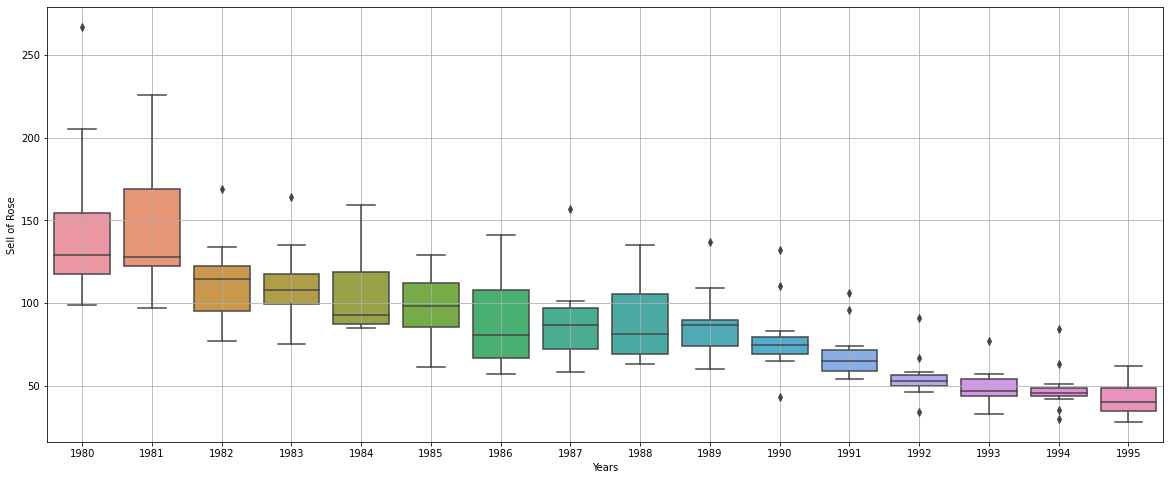

In [16]:
sns.boxplot(x = df2.index.year,y = df2['Rose'])
plt.grid();
plt.xlabel('Years');
plt.ylabel('Sell of Rose');

**Monthly Boxplot**

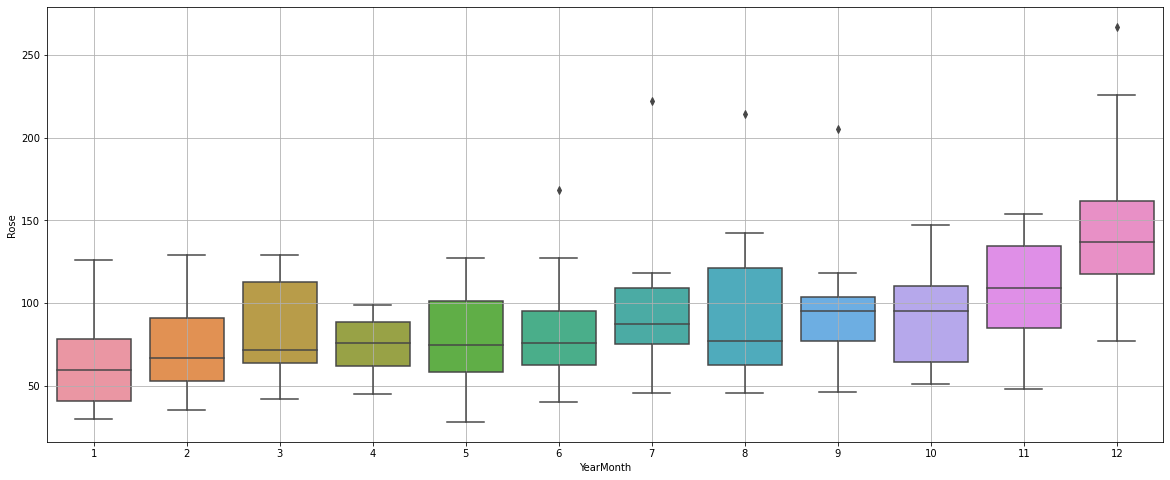

In [17]:
sns.boxplot(x = df2.index.month,y = df2['Rose'])
plt.grid();


In [18]:
from statsmodels.graphics.tsaplots import month_plot

C:\Users\91951\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)
C:\Users\91951\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


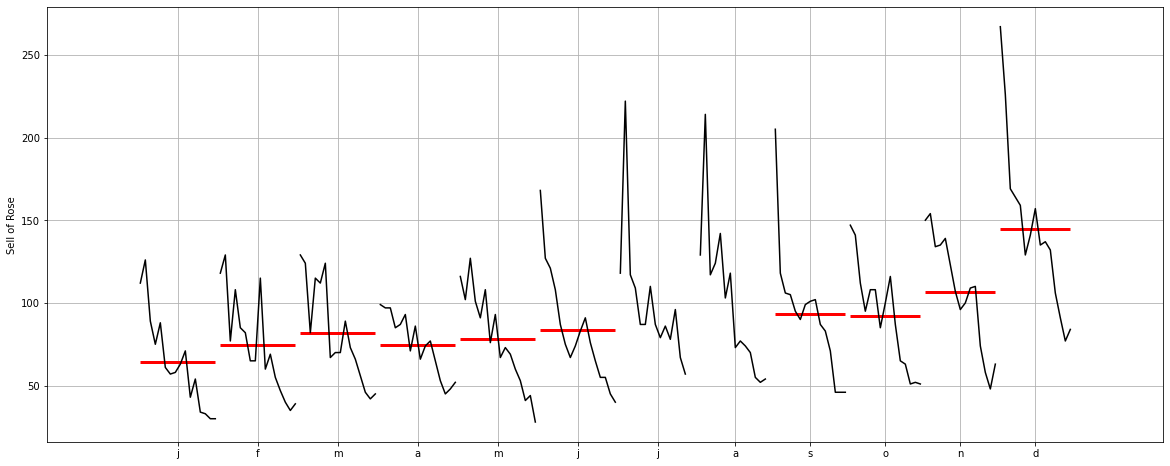

In [19]:
month_plot(df['Rose'],ylabel='Sell of Rose')
plt.grid();

**Monthly Sale Across Different Years**

In [14]:
monthly_sale_across_yeras = pd.pivot_table(df2, values = 'Rose', columns = df2.index.month, 
                                        index = df2.index.year)
monthly_sale_across_yeras


YearMonth,1,2,3,4,5,6,7,8,9,10,11,12
YearMonth,,,,,,,,,,,,
1980,112.0,118.0,129.0,99.0,116.0,168.0,118.000000,129.000000,205.0,147.0,150.0,267.0
1981,126.0,129.0,124.0,97.0,102.0,127.0,222.000000,214.000000,118.0,141.0,154.0,226.0
1982,89.0,77.0,82.0,97.0,127.0,121.0,117.000000,117.000000,106.0,112.0,134.0,169.0
1983,75.0,108.0,115.0,85.0,101.0,108.0,109.000000,124.000000,105.0,95.0,135.0,164.0
1984,88.0,85.0,112.0,87.0,91.0,87.0,87.000000,142.000000,95.0,108.0,139.0,159.0
1985,61.0,82.0,124.0,93.0,108.0,75.0,87.000000,103.000000,90.0,108.0,123.0,129.0
1986,57.0,65.0,67.0,71.0,76.0,67.0,110.000000,118.000000,99.0,85.0,107.0,141.0
1987,58.0,65.0,70.0,86.0,93.0,74.0,87.000000,73.000000,101.0,100.0,96.0,157.0
1988,63.0,115.0,70.0,66.0,67.0,83.0,79.000000,77.000000,102.0,116.0,100.0,135.0


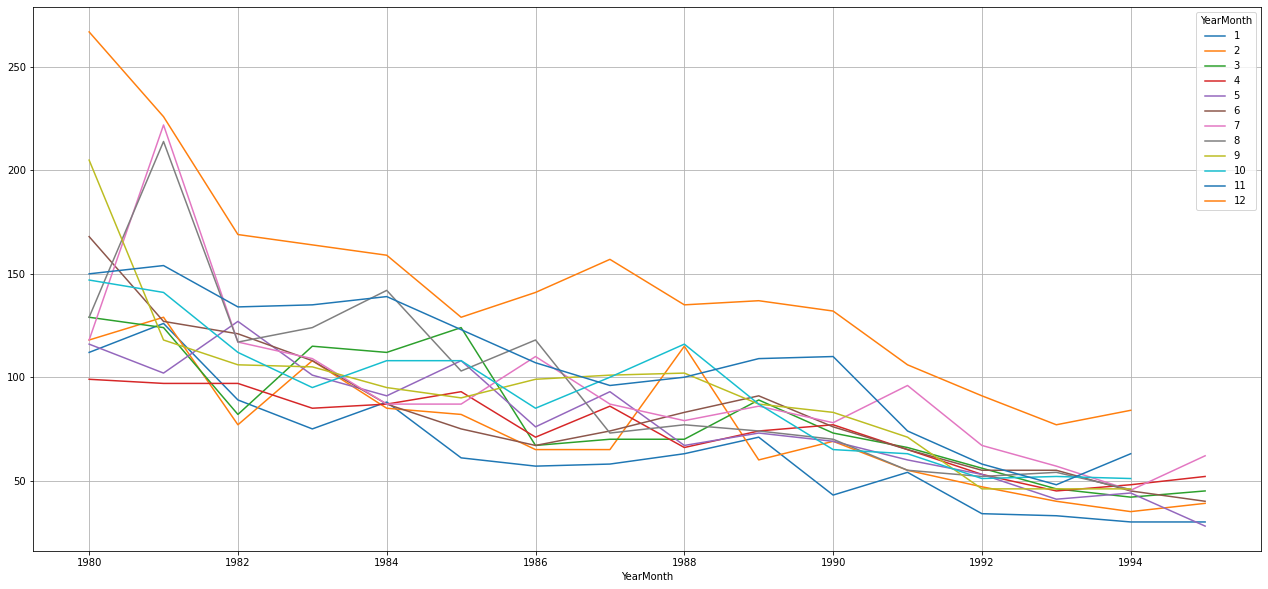

In [15]:
fig, ax = plt.subplots(figsize=(22,10))
monthly_sale_across_yeras.plot(ax=ax)
plt.grid();


**Yearly Sale**

In [16]:
df_yearly_sale = df2.resample('A').sum()
df_yearly_sale.head()

,Rose
YearMonth,
1980-12-31,1758.0
1981-12-31,1780.0
1982-12-31,1348.0
1983-12-31,1324.0
1984-12-31,1280.0


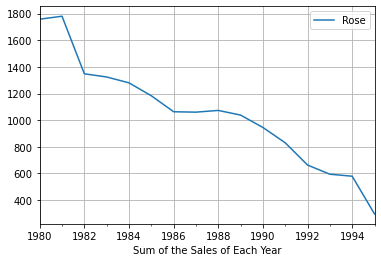

In [17]:
df_yearly_sale.plot();
plt.grid()
plt.xlabel('Sum of the Sales of Each Year');

**Average annual sale**

In [18]:
df_yearly_avg = df2.resample('Y').mean()
df_yearly_avg.head()

,Rose
YearMonth,
1980-12-31,146.500000
1981-12-31,148.333333
1982-12-31,112.333333
1983-12-31,110.333333
1984-12-31,106.666667


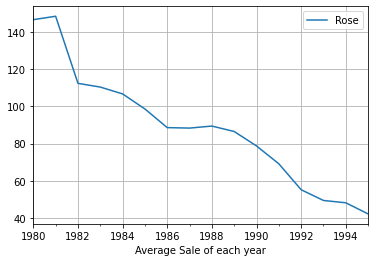

In [19]:
df_yearly_avg.plot();
plt.grid()
plt.xlabel('Average Sale of each year');

**Average Rose Sales per month and the month on month percentage change of Rose Sales.**

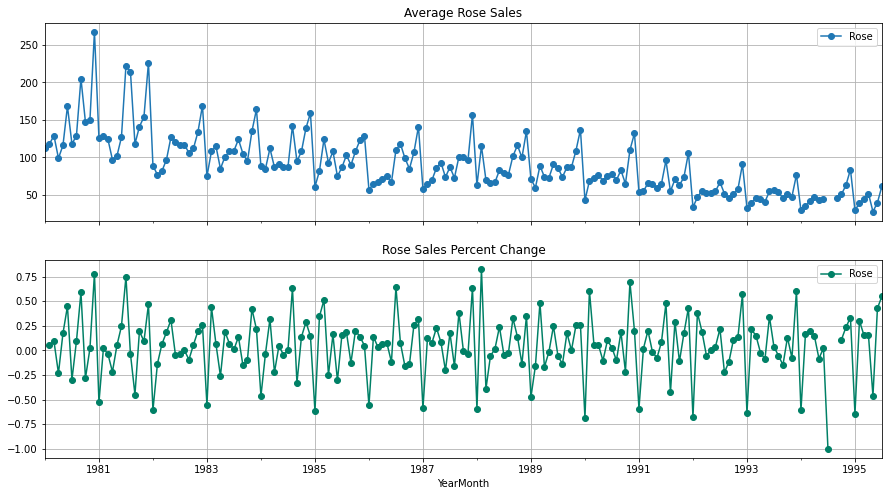

In [20]:
# group by date and get average RetailSales, and precent change
average    = df.groupby(df.index)["Rose"].mean()
pct_change = df.groupby(df.index)["Rose"].sum().pct_change()

fig, (axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(15,8))

# plot average RetailSales over time(year-month)
ax1 = average.plot(legend=True,ax=axis1,marker='o',title="Average Rose Sales",grid=True)
ax1.set_xticks(range(len(average)))
ax1.set_xticklabels(average.index.tolist())
# plot precent change for RetailSales over time(year-month)
ax2 = pct_change.plot(legend=True,ax=axis2,marker='o',colormap="summer",title="Rose Sales Percent Change",grid=True)

**Decomposition of data for Time series analysis**

In [21]:
from statsmodels.tsa.seasonal import seasonal_decompose
from pylab import rcParams

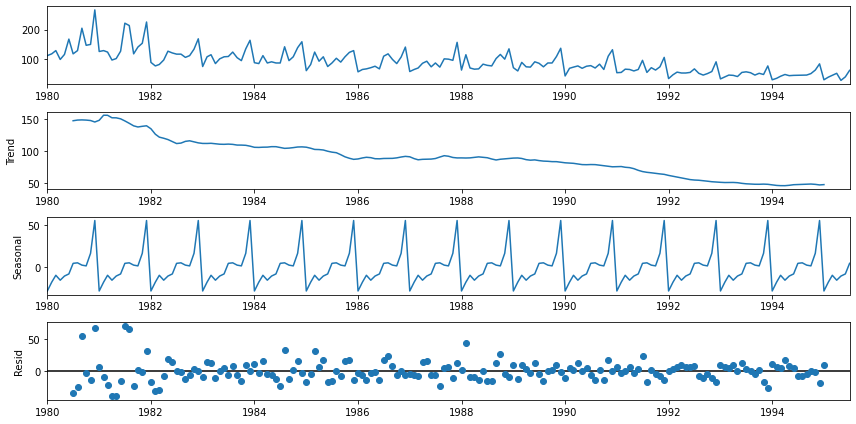

In [22]:
#Additive decomposition
rcParams['figure.figsize'] = 12,6
decomposition = seasonal_decompose(df2,model='additive')
decomposition.plot();

As observed in 'additive' decomposition, seasonality is present on yearly basis. There is a huge effect being shown in error term as well.

In [23]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 YearMonth
1980-01-01           NaN
1980-02-01           NaN
1980-03-01           NaN
1980-04-01           NaN
1980-05-01           NaN
1980-06-01           NaN
1980-07-01    147.083333
1980-08-01    148.125000
1980-09-01    148.375000
1980-10-01    148.083333
1980-11-01    147.416667
1980-12-01    145.125000
Name: trend, dtype: float64 

Seasonality 
 YearMonth
1980-01-01   -27.908647
1980-02-01   -17.435632
1980-03-01    -9.285830
1980-04-01   -15.098330
1980-05-01   -10.196544
1980-06-01    -7.678687
1980-07-01     4.896908
1980-08-01     5.499686
1980-09-01     2.774686
1980-10-01     1.871908
1980-11-01    16.846908
1980-12-01    55.713575
Name: seasonal, dtype: float64 

Residual 
 YearMonth
1980-01-01          NaN
1980-02-01          NaN
1980-03-01          NaN
1980-04-01          NaN
1980-05-01          NaN
1980-06-01          NaN
1980-07-01   -33.980241
1980-08-01   -24.624686
1980-09-01    53.850314
1980-10-01    -2.955241
1980-11-01   -14.263575
1980-12-01    66.16142

**Multiplicative decomposition**

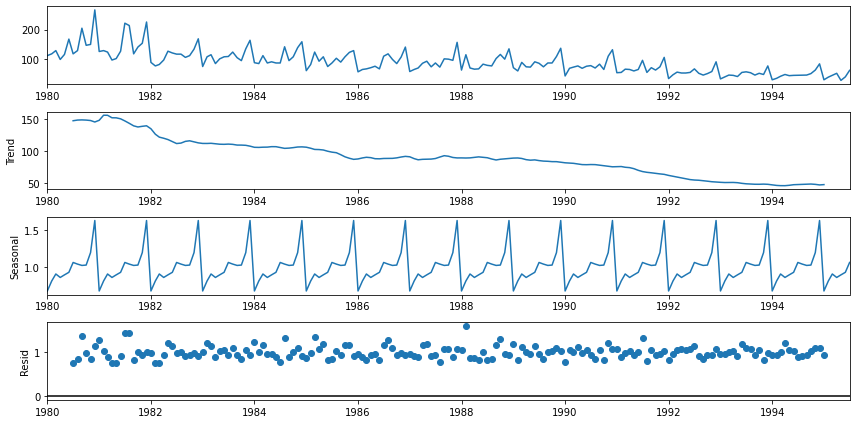

In [24]:
rcParams['figure.figsize'] = 12, 6

decomposition1 = seasonal_decompose(df2,model='multiplicative')
decomposition1.plot();
#decomposition.plot(); #addtitive

Effect of error is reduced in multipitive effect. 

In [26]:
trend_m = decomposition1.trend
seasonality_m = decomposition1.seasonal
residual_m = decomposition1.resid

print('Trend','\n',trend_m.head(12),'\n')
print('Seasonality','\n',seasonality_m.head(12),'\n')
print('Residual','\n',residual_m.head(12),'\n')

Trend 
 YearMonth
1980-01-01           NaN
1980-02-01           NaN
1980-03-01           NaN
1980-04-01           NaN
1980-05-01           NaN
1980-06-01           NaN
1980-07-01    147.083333
1980-08-01    148.125000
1980-09-01    148.375000
1980-10-01    148.083333
1980-11-01    147.416667
1980-12-01    145.125000
Name: trend, dtype: float64 

Seasonality 
 YearMonth
1980-01-01    0.670111
1980-02-01    0.806163
1980-03-01    0.901164
1980-04-01    0.854024
1980-05-01    0.889415
1980-06-01    0.923985
1980-07-01    1.058038
1980-08-01    1.035881
1980-09-01    1.017648
1980-10-01    1.022573
1980-11-01    1.192349
1980-12-01    1.628646
Name: seasonal, dtype: float64 

Residual 
 YearMonth
1980-01-01         NaN
1980-02-01         NaN
1980-03-01         NaN
1980-04-01         NaN
1980-05-01         NaN
1980-06-01         NaN
1980-07-01    0.758258
1980-08-01    0.840720
1980-09-01    1.357674
1980-10-01    0.970771
1980-11-01    0.853378
1980-12-01    1.129646
Name: resid, dtype: fl

### Q3: Split the data into training and test. The test data should start in 1991.

In [27]:
train=df2[df2.index.year < 1991]
test=df2[df2.index.year >= 1991]
print("Shape of Training Data is", train.shape)
print("Shape of Test Data is", test.shape)

Shape of Training Data is (132, 1)
Shape of Test Data is (55, 1)


In [28]:
display(train.tail())

,Rose
YearMonth,
1990-08-01,70.0
1990-09-01,83.0
1990-10-01,65.0
1990-11-01,110.0
1990-12-01,132.0


In [27]:
display(test.head())

,Rose
YearMonth,
1991-01-01,54.0
1991-02-01,55.0
1991-03-01,66.0
1991-04-01,65.0
1991-05-01,60.0


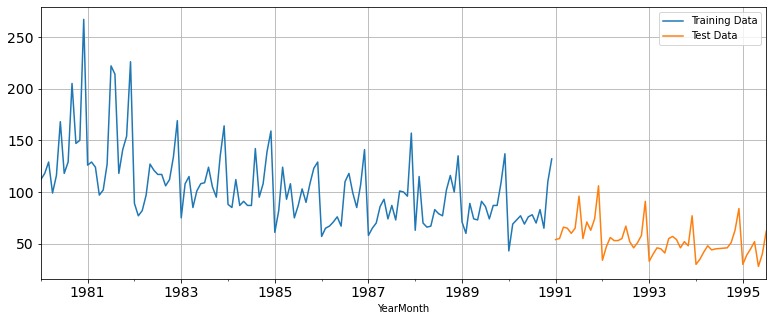

In [28]:
train['Rose'].plot(figsize=(13,5), fontsize=14)
test['Rose'].plot(figsize=(13,5), fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()

### Q4: Build various exponential smoothing models on the training data and evaluate the model using RMSE on the test data. 
- ### Other models such as regression,naïve forecast models and simple average models. 
- ### Should also be built on the training data and check the performance on the test data using RMSE.

**4.1. Building Regression Model**

In [29]:
# Regression Model

train_time = [i+1 for i in range(len(train))]
test_time = [i+133 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


In [30]:
LR_train = train.copy()
LR_test = test.copy()
LR_train['time'] = train_time
LR_test['time'] = test_time

In [31]:
print(LR_train.head())
print(LR_train.tail())

             Rose  time
YearMonth              
1980-01-01  112.0     1
1980-02-01  118.0     2
1980-03-01  129.0     3
1980-04-01   99.0     4
1980-05-01  116.0     5
             Rose  time
YearMonth              
1990-08-01   70.0   128
1990-09-01   83.0   129
1990-10-01   65.0   130
1990-11-01  110.0   131
1990-12-01  132.0   132


In [32]:
print(LR_test.head())
print(LR_test.tail())

            Rose  time
YearMonth             
1991-01-01  54.0   133
1991-02-01  55.0   134
1991-03-01  66.0   135
1991-04-01  65.0   136
1991-05-01  60.0   137
            Rose  time
YearMonth             
1995-03-01  45.0   183
1995-04-01  52.0   184
1995-05-01  28.0   185
1995-06-01  40.0   186
1995-07-01  62.0   187


In [33]:
import sklearn
print(sklearn.__version__)
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

0.24.1


In [34]:
lr.fit(LR_train[['time']], LR_train['Rose'].values)

LinearRegression()

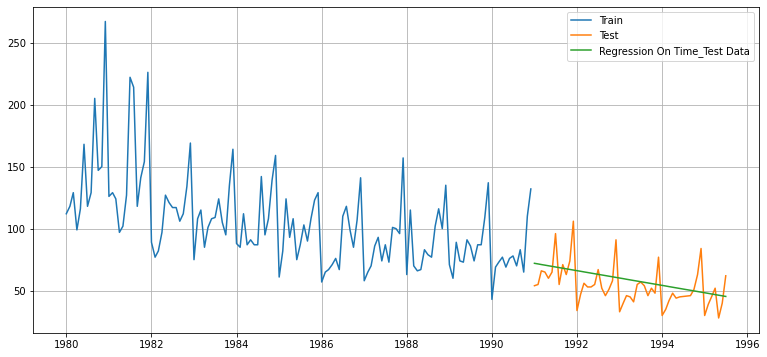

In [35]:
lr_predict = lr.predict(LR_test[['time']])
LR_test['RegOnTime'] = lr_predict

plt.figure(figsize=(13,6))
plt.plot( train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')
plt.plot(LR_test['RegOnTime'], label='Regression On Time_Test Data')
plt.legend(loc='best')
plt.grid();

**Conduct RMSE model evaluation**

In [36]:
from sklearn import metrics

In [37]:
#LR MODEL EVALUATION

rmse_lr = metrics.mean_squared_error(test['Rose'], lr_predict, squared=False)
print("RMSE of LR is %3.3f" %(rmse_lr))

RMSE of LR is 15.269


In [38]:
resultsDf = pd.DataFrame({'Test RMSE': [rmse_lr]},index=['RegressionOnTime'])
resultsDf

,Test RMSE
RegressionOnTime,15.268955


**4.2. Building Naïve Forecast Model**

In [39]:
#naïve forecast model

NM_test = test.copy()
NM_train = train.copy()

NM_test['naive'] = np.asarray(train['Rose'])[len(np.asarray(train['Rose']))-1]
NM_test['naive'].head()

YearMonth
1991-01-01    132.0
1991-02-01    132.0
1991-03-01    132.0
1991-04-01    132.0
1991-05-01    132.0
Name: naive, dtype: float64

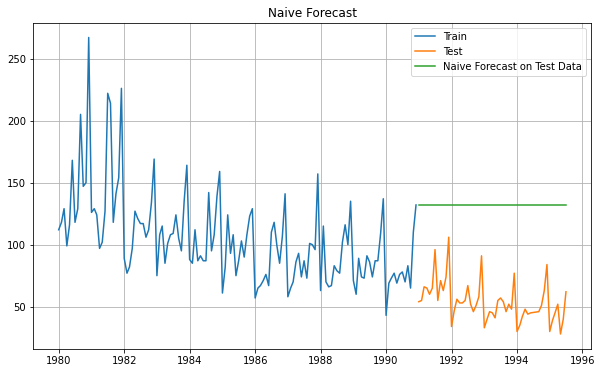

In [40]:
plt.figure(figsize=(10,6))
plt.plot(NM_train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')
plt.plot(NM_test['naive'], label='Naive Forecast on Test Data')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

In [41]:
#NF MODEL EVALUATION

rmse_nf = metrics.mean_squared_error(test['Rose'],NM_test['naive'],squared=False)
print("RMSE of NF is %3.3f" %(rmse_nf))

RMSE of NF is 79.719


In [42]:
resultsDf_NF = pd.DataFrame({'Test RMSE': [rmse_nf]},index=['NaiveModel'])

resultsDf = pd.concat([resultsDf, resultsDf_NF])
resultsDf

,Test RMSE
RegressionOnTime,15.268955
NaiveModel,79.718773


**4.3. Building Simple Average Model**

In [43]:
#Simple Average

SA_test = test.copy()
SA_train = train.copy()

SA_test['mean_forecast'] = train['Rose'].mean()
SA_test.head()

,Rose,mean_forecast
YearMonth,,
1991-01-01,54.0,104.939394
1991-02-01,55.0,104.939394
1991-03-01,66.0,104.939394
1991-04-01,65.0,104.939394
1991-05-01,60.0,104.939394


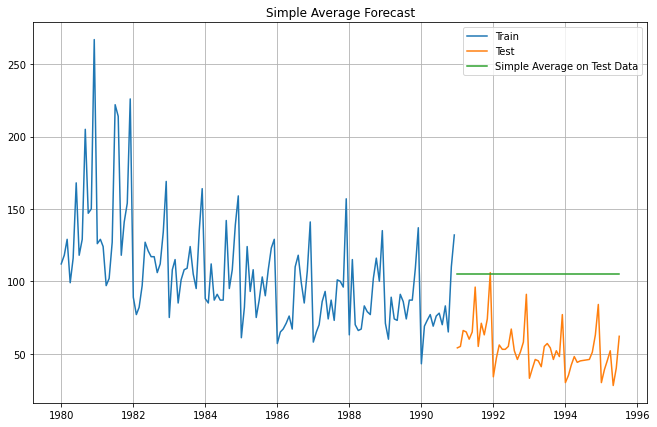

In [44]:
plt.figure(figsize=(11,7))
plt.plot(SA_train['Rose'], label='Train')
plt.plot(SA_test['Rose'], label='Test')
plt.plot(SA_test['mean_forecast'], label='Simple Average on Test Data')
plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

In [45]:
#SA MODEL EVALUATION

rmse_sa = metrics.mean_squared_error(test['Rose'],SA_test['mean_forecast'],squared=False)
print("RMSE of SA isis %3.3f" %(rmse_sa))

RMSE of SA isis 53.461


In [46]:
resultsDf_SA = pd.DataFrame({'Test RMSE': [rmse_sa]},index=['SimpleAverageModel'])

resultsDf = pd.concat([resultsDf, resultsDf_SA])
resultsDf

,Test RMSE
RegressionOnTime,15.268955
NaiveModel,79.718773
SimpleAverageModel,53.460570


**Building Exponential Smoothing Models**

In [47]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
# for ExponentialSmoothing

**4.4. Building Single Exponential Smoothining Model (SES)**

In [48]:
SES_test = test.copy()
SES_train = train.copy()

In [49]:
model_SES = SimpleExpSmoothing(SES_train['Rose'])
model_SES_autofit = model_SES.fit(optimized=True)
model_SES_autofit.params

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


{'smoothing_level': 0.0987493111726833,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 134.38720226208358,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [50]:
SES_test['predict'] = model_SES_autofit.forecast(steps=len(test))
SES_test.head()

,Rose,predict
YearMonth,,
1991-01-01,54.0,87.104983
1991-02-01,55.0,87.104983
1991-03-01,66.0,87.104983
1991-04-01,65.0,87.104983
1991-05-01,60.0,87.104983


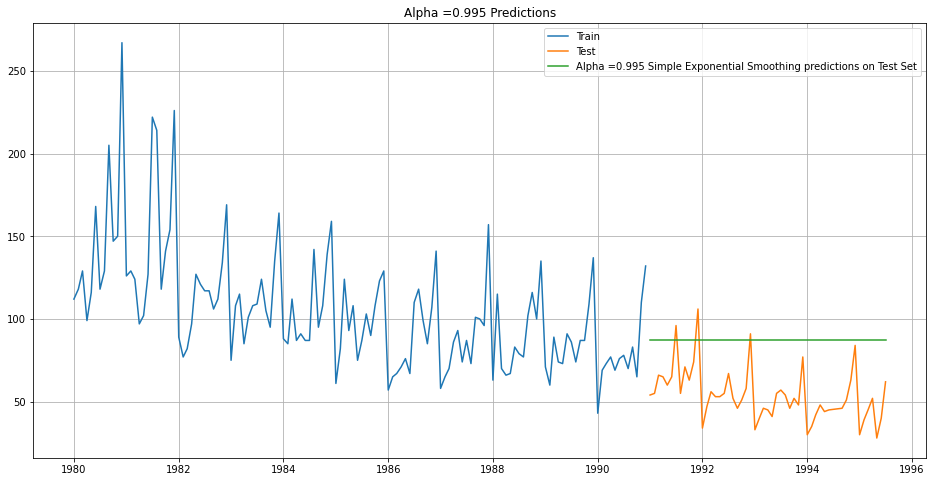

In [51]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(SES_train['Rose'], label='Train')
plt.plot(SES_test['Rose'], label='Test')

plt.plot(SES_test['predict'], label='Alpha =0.995 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha =0.995 Predictions');

**SES Model Evaluation**

In [52]:
rmse_ses = metrics.mean_squared_error(SES_test['Rose'],SES_test['predict'],squared=False)
print("For Alpha =0.995, RMSE of SES is %3.3f" %(rmse_ses))

For Alpha =0.995, RMSE of SES is 36.796


In [53]:
resultsDf_SES = pd.DataFrame({'Test RMSE': [rmse_ses]},index=['Alpha=0.995,SimpleExponentialSmoothing'])
resultsDf = pd.concat([resultsDf, resultsDf_SES])
resultsDf

,Test RMSE
RegressionOnTime,15.268955
NaiveModel,79.718773
SimpleAverageModel,53.460570
"Alpha=0.995,SimpleExponentialSmoothing",36.796227


**4.5. Building Double Exponential Smoothing - Holt's Model**

In [54]:
DES_test = test.copy()
DES_train = train.copy()
model_DES = Holt(DES_train['Rose'])

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [55]:
resultsDf_DES = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_DES

,Alpha Values,Beta Values,Train RMSE,Test RMSE


In [56]:
for i in np.arange(0.3,1.1,0.1):
    for j in np.arange(0.3,1.1,0.1):
        model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_trend= j, optimized=False, use_brute=True)
        DES_train['predict',i,j] = model_DES_alpha_i_j.fittedvalues
        DES_test['predict',i,j] = model_DES_alpha_i_j.forecast(steps=18)
        
        rmse_DES_train = metrics.mean_squared_error(DES_train['Rose'],DES_train['predict',i,j])
        
        rmse_DES_test = metrics.mean_squared_error(DES_train['Rose'],DES_train['predict',i,j],)
        
        resultsDf_DES = resultsDf_DES.append({'Alpha Values':i,'Beta Values':j,'Train RMSE':rmse_DES_train
                                          ,'Test RMSE':rmse_DES_test}, ignore_index=True)

In [57]:
resultsDf_DES

,Alpha Values,Beta Values,Train RMSE,Test RMSE
0,0.3,0.3,1292.041812,1292.041812
1,0.3,0.4,1398.254302,1398.254302
2,0.3,0.5,1512.301839,1512.301839
3,0.3,0.6,1622.532350,1622.532350
4,0.3,0.7,1714.251300,1714.251300
...,...,...,...,...
59,1.0,0.6,2686.515763,2686.515763
60,1.0,0.7,2969.927275,2969.927275
61,1.0,0.8,3290.844073,3290.844073
62,1.0,0.9,3657.142037,3657.142037


In [58]:
resultsDf_DES.sort_values(by=['Test RMSE']).head()

,Alpha Values,Beta Values,Train RMSE,Test RMSE
0,0.3,0.3,1292.041812,1292.041812
8,0.4,0.3,1350.498017,1350.498017
1,0.3,0.4,1398.254302,1398.254302
16,0.5,0.3,1401.253029,1401.253029
9,0.4,0.4,1444.351306,1444.351306


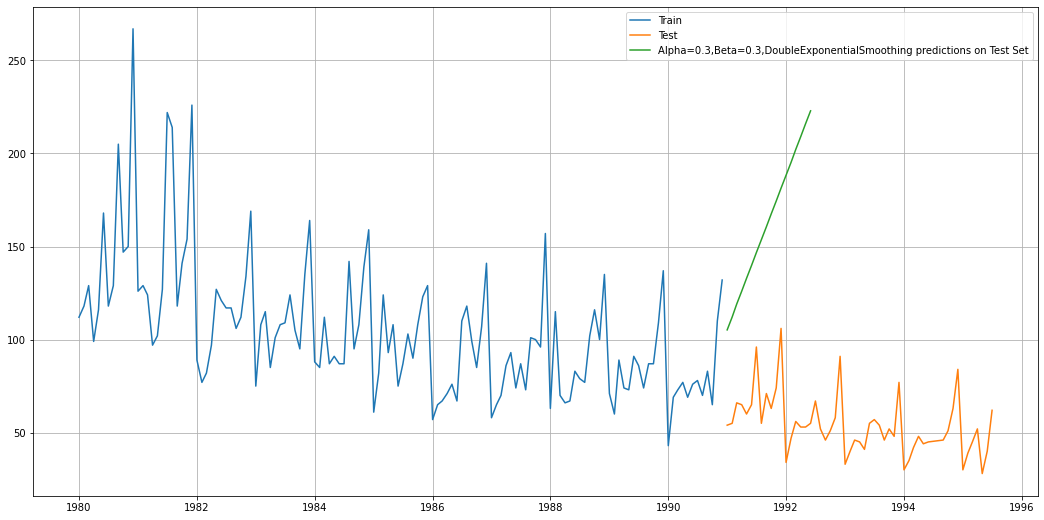

In [59]:
plt.figure(figsize=(18,9))
plt.plot(DES_train['Rose'], label='Train')
plt.plot(DES_test['Rose'], label='Test')

plt.plot(DES_test['predict', 0.3, 0.3], label='Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [60]:
resultsDf_DES_1 = pd.DataFrame({'Test RMSE': [resultsDf_DES.sort_values(by=['Test RMSE']).values[0][3]]}
                           ,index=['Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_DES_1])
resultsDf

,Test RMSE
RegressionOnTime,15.268955
NaiveModel,79.718773
SimpleAverageModel,53.460570
"Alpha=0.995,SimpleExponentialSmoothing",36.796227
"Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing",1292.041812


**4.6. Building Triple Exponential Smoothing (Holt - Winter's Model)**

In [61]:
TES_test = test.copy()
TES_train = train.copy()

In [62]:
model_TES = ExponentialSmoothing(TES_train['Rose'],trend='additive',seasonal='multiplicative',freq='MS')
#MS- Month Start

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [63]:
model_TES_autofit = model_TES.fit()

In [64]:
model_TES_autofit.params

{'smoothing_level': 0.06569374607191865,
 'smoothing_trend': 0.05192938504457338,
 'smoothing_seasonal': 3.879136202038614e-06,
 'damping_trend': nan,
 'initial_level': 54.10985491750761,
 'initial_trend': -0.33471965714896845,
 'initial_seasons': array([2.08282313, 2.36326666, 2.58210206, 2.25702695, 2.53757493,
        2.76639991, 3.04101803, 3.23434567, 3.06747277, 3.00164124,
        3.49893806, 4.82552476]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [65]:
TES_test['auto_predict'] = model_TES_autofit.forecast(steps=len(test))
TES_test.head()

,Rose,auto_predict
YearMonth,,
1991-01-01,54.0,56.689174
1991-02-01,55.0,64.129166
1991-03-01,66.0,69.856436
1991-04-01,65.0,60.877474
1991-05-01,60.0,68.237072


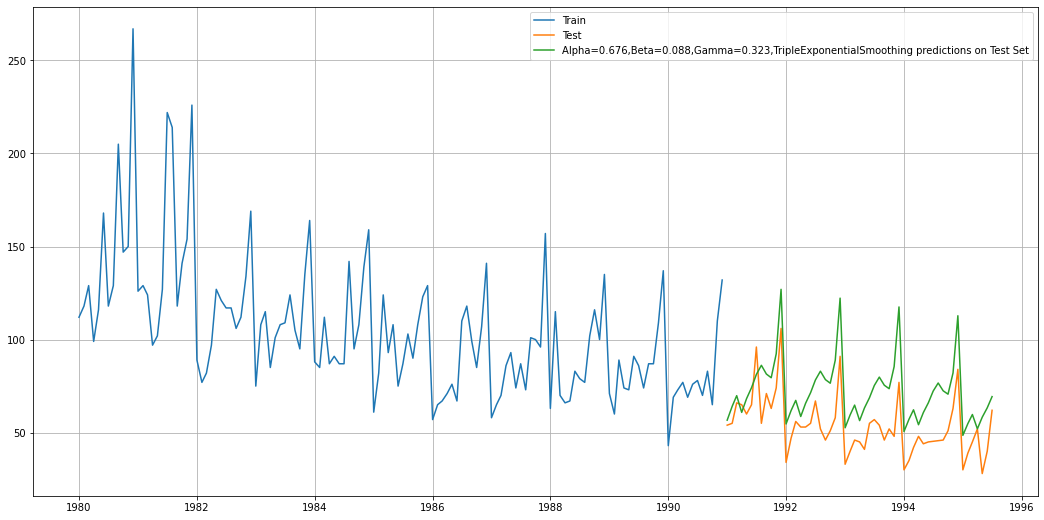

In [66]:
plt.figure(figsize=(18,9))
plt.plot(TES_train['Rose'], label='Train')
plt.plot(TES_test['Rose'], label='Test')

plt.plot(TES_test['auto_predict'], label='Alpha=0.676,Beta=0.088,Gamma=0.323,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [67]:
# Triple Exponential Smoothing (Holt - Winter's Model) Model Evaluation

rmse_TES = metrics.mean_squared_error(TES_test['Rose'],TES_test['auto_predict'],squared=False)
print("For Alpha=0.676,Beta=0.088,Gamma=0.323, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is %3.3f" %(rmse_TES))

For Alpha=0.676,Beta=0.088,Gamma=0.323, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is 21.020


In [72]:
resultsDf_SES = pd.DataFrame({'Test RMSE': [rmse_ses]}
                           ,index=['Alpha=0.676,Beta=0.088,Gamma=0.323,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_SES])
resultsDf

,Test RMSE
RegressionOnTime,15.268955
NaiveModel,79.718773
SimpleAverageModel,53.460570
"Alpha=0.995,SimpleExponentialSmoothing",36.796227
"Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing",1292.041812
"Alpha=0.676,Beta=0.088,Gamma=0.323,TripleExponentialSmoothing",36.796227
"Alpha=0.676,Beta=0.088,Gamma=0.323,TripleExponentialSmoothing",36.796227
"Alpha=0.676,Beta=0.088,Gamma=0.323,TripleExponentialSmoothing",36.796227


### Q5: Check for the stationarity of the data on which the model is being built on using appropriate statistical tests and also mention the hypothesis for the statistical test. If the data is found to be non-stationary, take appropriate steps to make it stationary. Check the new data for stationarity and comment. Note: Stationarity should be checked at alpha = 0.05.

In [81]:
from statsmodels.tsa.stattools import adfuller 


In [78]:
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=7).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

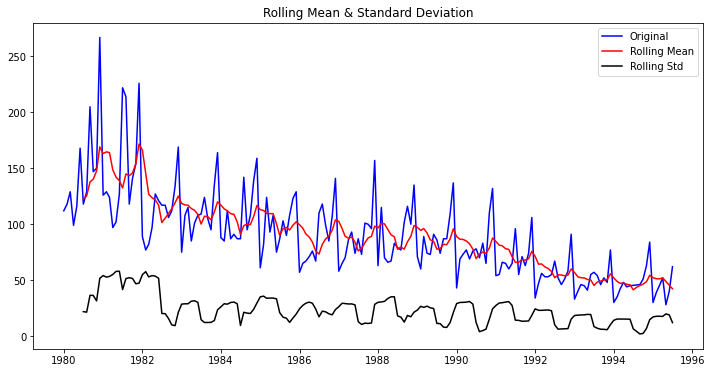

Results of Dickey-Fuller Test:
Test Statistic                  -1.876699
p-value                          0.343101
#Lags Used                      13.000000
Number of Observations Used    173.000000
Critical Value (1%)             -3.468726
Critical Value (5%)             -2.878396
Critical Value (10%)            -2.575756
dtype: float64 



In [80]:
test_stationarity(df2['Rose'])

p-value 0.343101, Thus series is non stationarity.

Difference of order 1, to check the time series again

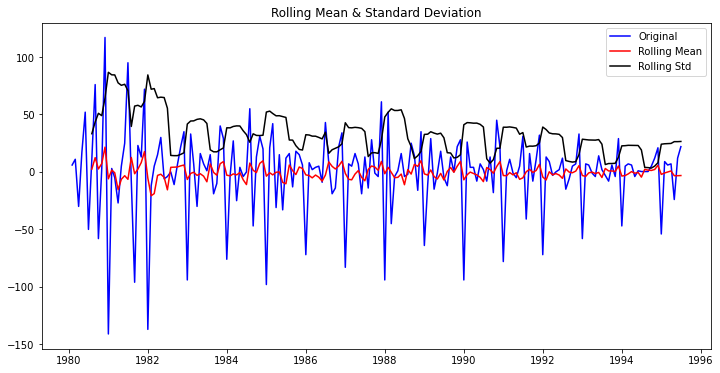

Results of Dickey-Fuller Test:
Test Statistic                -8.044392e+00
p-value                        1.810895e-12
#Lags Used                     1.200000e+01
Number of Observations Used    1.730000e+02
Critical Value (1%)           -3.468726e+00
Critical Value (5%)           -2.878396e+00
Critical Value (10%)          -2.575756e+00
dtype: float64 



In [83]:
test_stationarity(df2['Rose'].diff().dropna())

Now, series is stationarity at alpha =0.05

### Q6: Build an automated version of the ARIMA/SARIMA model in which the parameters are selected using the lowest Akaike Information Criteria (AIC) on the training data and evaluate this model on the test data using RMSE.

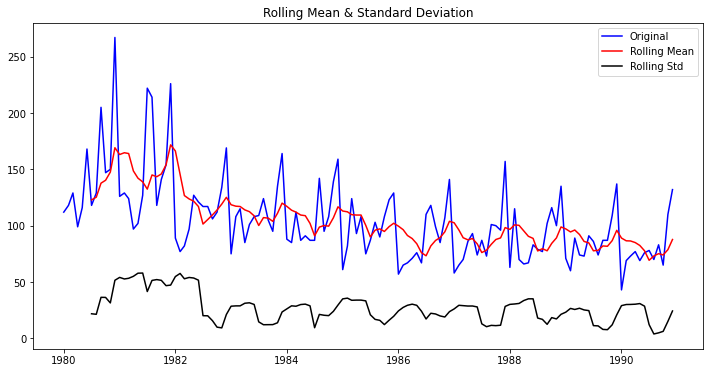

Results of Dickey-Fuller Test:
Test Statistic                  -2.164250
p-value                          0.219476
#Lags Used                      13.000000
Number of Observations Used    118.000000
Critical Value (1%)             -3.487022
Critical Value (5%)             -2.886363
Critical Value (10%)            -2.580009
dtype: float64 



In [84]:
test_stationarity(train['Rose'])

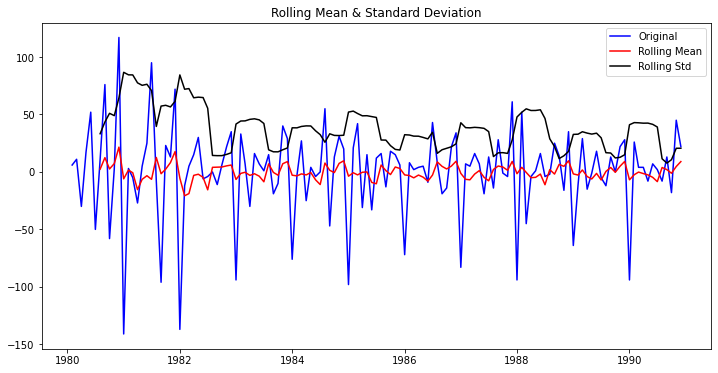

Results of Dickey-Fuller Test:
Test Statistic                -6.592372e+00
p-value                        7.061944e-09
#Lags Used                     1.200000e+01
Number of Observations Used    1.180000e+02
Critical Value (1%)           -3.487022e+00
Critical Value (5%)           -2.886363e+00
Critical Value (10%)          -2.580009e+00
dtype: float64 



In [85]:
test_stationarity(train['Rose'].diff().dropna())

In [89]:
import itertools
from statsmodels.tsa.arima_model import ARIMA

In [171]:
p = q = range(0, 4)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (0, 1, 3)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (1, 1, 3)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)
Model: (2, 1, 3)
Model: (3, 1, 0)
Model: (3, 1, 1)
Model: (3, 1, 2)
Model: (3, 1, 3)


In [172]:
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

,param,AIC


In [173]:
for param in pdq:
    ARIMA_model = ARIMA(train['Rose'].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


ARIMA(0, 1, 0) - AIC:1335.1526583086775
ARIMA(0, 1, 1) - AIC:1280.726183046448
ARIMA(0, 1, 2) - AIC:1276.8353734911866
ARIMA(0, 1, 3) - AIC:1278.0742599150858
ARIMA(1, 1, 0) - AIC:1319.3483105802602


C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


ARIMA(1, 1, 1) - AIC:1277.775753553521


C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


ARIMA(1, 1, 2) - AIC:1277.3592281129256


C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA ha

ARIMA(1, 1, 3) - AIC:1279.312639992571
ARIMA(2, 1, 0) - AIC:1300.6092611744193


C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


ARIMA(2, 1, 1) - AIC:1279.0456894093354
ARIMA(2, 1, 2) - AIC:1279.2986939365205


C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


ARIMA(2, 1, 3) - AIC:1281.1962260431185
ARIMA(3, 1, 0) - AIC:1299.4787391543089


C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


ARIMA(3, 1, 1) - AIC:1279.6059618578536


C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


ARIMA(3, 1, 2) - AIC:1280.96924676004
ARIMA(3, 1, 3) - AIC:1273.1940974617016


C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [174]:
ARIMA_AIC.sort_values(by='AIC',ascending=True)  #ascending order sort

,param,AIC
15,"(3, 1, 3)",1273.194097
2,"(0, 1, 2)",1276.835373
6,"(1, 1, 2)",1277.359228
5,"(1, 1, 1)",1277.775754
3,"(0, 1, 3)",1278.074260
9,"(2, 1, 1)",1279.045689
10,"(2, 1, 2)",1279.298694
7,"(1, 1, 3)",1279.312640
13,"(3, 1, 1)",1279.605962
1,"(0, 1, 1)",1280.726183


In [175]:
auto_ARIMA = ARIMA(train['Rose'], order=(3,1,3),freq='MS')

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                             ARIMA Model Results                              
Dep. Variable:                 D.Rose   No. Observations:                  131
Model:                 ARIMA(3, 1, 3)   Log Likelihood                -628.597
Method:                       css-mle   S.D. of innovations             28.356
Date:                Sun, 20 Jun 2021   AIC                           1273.194
Time:                        03:29:10   BIC                           1296.196
Sample:                    02-01-1980   HQIC                          1282.541
                         - 12-01-1990                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.4906      0.088     -5.548      0.000      -0.664      -0.317
ar.L1.D.Rose    -0.7243      0.086     -8.411      0.000      -0.893      -0.556
ar.L2.D.Rose    -0.7218      0.087     -8.34

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [176]:
predicted_auto_ARIMA_AIC = results_auto_ARIMA.forecast(steps=len(test))

In [177]:
from sklearn.metrics import  mean_squared_error
rmse = metrics.mean_squared_error(test['Rose'],predicted_auto_ARIMA_AIC[0], squared = False)
print(rmse)

15.986441154283346


In [178]:
resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['ARIMA(3,1,3)(AIC)'])

resultsDf

,RMSE
"ARIMA(3,1,3)(AIC)",15.986441


**SARIMA using AIC**

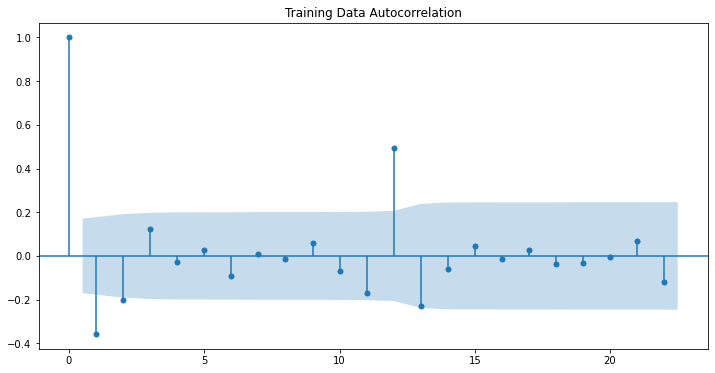

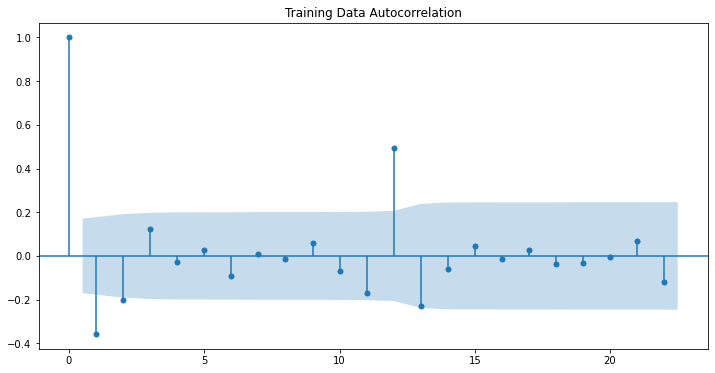

In [170]:
plot_acf(train.diff(),title='Training Data Autocorrelation',missing='drop')

In [231]:
import itertools
p = q = range(0, 4)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
PDQ = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of the parameter combinations for the Model are')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], PDQ[i]))

Examples of the parameter combinations for the Model are
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (0, 1, 3)(0, 0, 3, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (1, 1, 3)(1, 0, 3, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)
Model: (2, 1, 3)(2, 0, 3, 12)
Model: (3, 1, 0)(3, 0, 0, 12)
Model: (3, 1, 1)(3, 0, 1, 12)
Model: (3, 1, 2)(3, 0, 2, 12)
Model: (3, 1, 3)(3, 0, 3, 12)


In [232]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

,param,seasonal,AIC


In [233]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in PDQ:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:1323.9657875279158
SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1145.4230827207175
SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:976.4375296380895
SARIMA(0, 1, 0)x(0, 0, 3, 12) - AIC:3586.802455258465
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:1139.921738995602
SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1116.0207869386002
SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:969.6913635750373


C:\Users\hp\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 0)x(1, 0, 3, 12) - AIC:3531.7454740467456
SARIMA(0, 1, 0)x(2, 0, 0, 12) - AIC:960.8812220353041
SARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC:962.8794540697546
SARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC:955.5735408945867


C:\Users\hp\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 0)x(2, 0, 3, 12) - AIC:4080.962786826799
SARIMA(0, 1, 0)x(3, 0, 0, 12) - AIC:850.753540393109
SARIMA(0, 1, 0)x(3, 0, 1, 12) - AIC:851.748270265051
SARIMA(0, 1, 0)x(3, 0, 2, 12) - AIC:850.5304136127429


C:\Users\hp\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 0)x(3, 0, 3, 12) - AIC:3159.536319367785
SARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:1263.5369097383964
SARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:1098.5554825918339
SARIMA(0, 1, 1)x(0, 0, 2, 12) - AIC:923.6314049383807


C:\Users\hp\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 1)x(0, 0, 3, 12) - AIC:1756.3302538102125
SARIMA(0, 1, 1)x(1, 0, 0, 12) - AIC:1095.793632491795
SARIMA(0, 1, 1)x(1, 0, 1, 12) - AIC:1054.743433094548
SARIMA(0, 1, 1)x(1, 0, 2, 12) - AIC:918.8573483311407


C:\Users\hp\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 1)x(1, 0, 3, 12) - AIC:3754.435772024714
SARIMA(0, 1, 1)x(2, 0, 0, 12) - AIC:914.5982866536075
SARIMA(0, 1, 1)x(2, 0, 1, 12) - AIC:915.3332430461666
SARIMA(0, 1, 1)x(2, 0, 2, 12) - AIC:901.1988257864924


C:\Users\hp\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 1)x(2, 0, 3, 12) - AIC:3669.927074104481
SARIMA(0, 1, 1)x(3, 0, 0, 12) - AIC:798.588976478365
SARIMA(0, 1, 1)x(3, 0, 1, 12) - AIC:800.484493162141
SARIMA(0, 1, 1)x(3, 0, 2, 12) - AIC:801.0595269295479


C:\Users\hp\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 1)x(3, 0, 3, 12) - AIC:3670.5036480194194
SARIMA(0, 1, 2)x(0, 0, 0, 12) - AIC:1251.667543054104
SARIMA(0, 1, 2)x(0, 0, 1, 12) - AIC:1083.4866975264913
SARIMA(0, 1, 2)x(0, 0, 2, 12) - AIC:913.49384866177
SARIMA(0, 1, 2)x(0, 0, 3, 12) - AIC:158.04717504696248
SARIMA(0, 1, 2)x(1, 0, 0, 12) - AIC:1088.8332843413673
SARIMA(0, 1, 2)x(1, 0, 1, 12) - AIC:1045.540093355627
SARIMA(0, 1, 2)x(1, 0, 2, 12) - AIC:904.8310913510973


C:\Users\hp\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 2)x(1, 0, 3, 12) - AIC:2771.779388412248
SARIMA(0, 1, 2)x(2, 0, 0, 12) - AIC:913.0105912257978
SARIMA(0, 1, 2)x(2, 0, 1, 12) - AIC:914.1707545034652
SARIMA(0, 1, 2)x(2, 0, 2, 12) - AIC:887.9375085679284
SARIMA(0, 1, 2)x(2, 0, 3, 12) - AIC:2806.1974525646838
SARIMA(0, 1, 2)x(3, 0, 0, 12) - AIC:800.1020189375205
SARIMA(0, 1, 2)x(3, 0, 1, 12) - AIC:801.9941080533189
SARIMA(0, 1, 2)x(3, 0, 2, 12) - AIC:802.5206528375007


C:\Users\hp\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 2)x(3, 0, 3, 12) - AIC:2325.9897665309527
SARIMA(0, 1, 3)x(0, 0, 0, 12) - AIC:1243.9501216739152
SARIMA(0, 1, 3)x(0, 0, 1, 12) - AIC:1076.7632646079987
SARIMA(0, 1, 3)x(0, 0, 2, 12) - AIC:905.6926533380488
SARIMA(0, 1, 3)x(0, 0, 3, 12) - AIC:6463.753500681877
SARIMA(0, 1, 3)x(1, 0, 0, 12) - AIC:1089.2051361212232
SARIMA(0, 1, 3)x(1, 0, 1, 12) - AIC:1034.8411212936157
SARIMA(0, 1, 3)x(1, 0, 2, 12) - AIC:896.8362523339798


C:\Users\hp\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 3)x(1, 0, 3, 12) - AIC:3506.8771529664245
SARIMA(0, 1, 3)x(2, 0, 0, 12) - AIC:914.9477108987096
SARIMA(0, 1, 3)x(2, 0, 1, 12) - AIC:916.0630996896724
SARIMA(0, 1, 3)x(2, 0, 2, 12) - AIC:880.5509788253905


C:\Users\hp\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 3)x(2, 0, 3, 12) - AIC:3654.1023345947006
SARIMA(0, 1, 3)x(3, 0, 0, 12) - AIC:802.0987124771223
SARIMA(0, 1, 3)x(3, 0, 1, 12) - AIC:803.9928772338811
SARIMA(0, 1, 3)x(3, 0, 2, 12) - AIC:804.5150742952799


C:\Users\hp\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 3)x(3, 0, 3, 12) - AIC:3447.0442112587525
SARIMA(1, 1, 0)x(0, 0, 0, 12) - AIC:1308.161871082466
SARIMA(1, 1, 0)x(0, 0, 1, 12) - AIC:1135.2955447585719
SARIMA(1, 1, 0)x(0, 0, 2, 12) - AIC:963.9405391257686
SARIMA(1, 1, 0)x(0, 0, 3, 12) - AIC:3252.649513531253
SARIMA(1, 1, 0)x(1, 0, 0, 12) - AIC:1124.886078680458
SARIMA(1, 1, 0)x(1, 0, 1, 12) - AIC:1105.4080055024756
SARIMA(1, 1, 0)x(1, 0, 2, 12) - AIC:958.5001972948405


C:\Users\hp\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 0)x(1, 0, 3, 12) - AIC:3583.9321426323586
SARIMA(1, 1, 0)x(2, 0, 0, 12) - AIC:939.0984778664119
SARIMA(1, 1, 0)x(2, 0, 1, 12) - AIC:940.9087133661067
SARIMA(1, 1, 0)x(2, 0, 2, 12) - AIC:942.2973103071082


C:\Users\hp\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 0)x(2, 0, 3, 12) - AIC:3500.2473967618935
SARIMA(1, 1, 0)x(3, 0, 0, 12) - AIC:819.3931032272586
SARIMA(1, 1, 0)x(3, 0, 1, 12) - AIC:821.1501371573468
SARIMA(1, 1, 0)x(3, 0, 2, 12) - AIC:819.1305086843471


C:\Users\hp\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 0)x(3, 0, 3, 12) - AIC:3501.5266003184515
SARIMA(1, 1, 1)x(0, 0, 0, 12) - AIC:1262.1840064255505
SARIMA(1, 1, 1)x(0, 0, 1, 12) - AIC:1094.317270864085
SARIMA(1, 1, 1)x(0, 0, 2, 12) - AIC:923.0862224063868


C:\Users\hp\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 1)x(0, 0, 3, 12) - AIC:88.91265393428591
SARIMA(1, 1, 1)x(1, 0, 0, 12) - AIC:1083.3937965032806
SARIMA(1, 1, 1)x(1, 0, 1, 12) - AIC:1054.7180547135129
SARIMA(1, 1, 1)x(1, 0, 2, 12) - AIC:916.3549428500592
SARIMA(1, 1, 1)x(1, 0, 3, 12) - AIC:3860.0094596655986
SARIMA(1, 1, 1)x(2, 0, 0, 12) - AIC:905.924906084468
SARIMA(1, 1, 1)x(2, 0, 1, 12) - AIC:907.2972867470745
SARIMA(1, 1, 1)x(2, 0, 2, 12) - AIC:900.6725795936856
SARIMA(1, 1, 1)x(2, 0, 3, 12) - AIC:3775.4919354502554
SARIMA(1, 1, 1)x(3, 0, 0, 12) - AIC:789.2360439386802
SARIMA(1, 1, 1)x(3, 0, 1, 12) - AIC:790.9603447855586
SARIMA(1, 1, 1)x(3, 0, 2, 12) - AIC:790.8113850266941
SARIMA(1, 1, 1)x(3, 0, 3, 12) - AIC:3776.0905935166998
SARIMA(1, 1, 2)x(0, 0, 0, 12) - AIC:1251.9495040706236
SARIMA(1, 1, 2)x(0, 0, 1, 12) - AIC:1085.4861928100865
SARIMA(1, 1, 2)x(0, 0, 2, 12) - AIC:915.4938413564623


C:\Users\hp\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 2)x(0, 0, 3, 12) - AIC:2148.5915313379674
SARIMA(1, 1, 2)x(1, 0, 0, 12) - AIC:1090.7760922493494
SARIMA(1, 1, 2)x(1, 0, 1, 12) - AIC:1042.6183220083724
SARIMA(1, 1, 2)x(1, 0, 2, 12) - AIC:906.731849990849


C:\Users\hp\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 2)x(1, 0, 3, 12) - AIC:3747.38728102494
SARIMA(1, 1, 2)x(2, 0, 0, 12) - AIC:906.1690197403764
SARIMA(1, 1, 2)x(2, 0, 1, 12) - AIC:907.4597827986624
SARIMA(1, 1, 2)x(2, 0, 2, 12) - AIC:889.9026503732757
SARIMA(1, 1, 2)x(2, 0, 3, 12) - AIC:3737.067290919317
SARIMA(1, 1, 2)x(3, 0, 0, 12) - AIC:791.007380246502
SARIMA(1, 1, 2)x(3, 0, 1, 12) - AIC:792.6312805560863
SARIMA(1, 1, 2)x(3, 0, 2, 12) - AIC:792.139028233154


C:\Users\hp\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 2)x(3, 0, 3, 12) - AIC:3659.794435987789
SARIMA(1, 1, 3)x(0, 0, 0, 12) - AIC:1245.5463125316496
SARIMA(1, 1, 3)x(0, 0, 1, 12) - AIC:1072.984973917893
SARIMA(1, 1, 3)x(0, 0, 2, 12) - AIC:907.4130105115576


C:\Users\hp\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 3)x(0, 0, 3, 12) - AIC:4809.859129408176
SARIMA(1, 1, 3)x(1, 0, 0, 12) - AIC:1082.3281487676177
SARIMA(1, 1, 3)x(1, 0, 1, 12) - AIC:1036.1950927105722
SARIMA(1, 1, 3)x(1, 0, 2, 12) - AIC:897.5232291558189


C:\Users\hp\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 3)x(1, 0, 3, 12) - AIC:2890.4457290522037
SARIMA(1, 1, 3)x(2, 0, 0, 12) - AIC:908.2687609711808
SARIMA(1, 1, 3)x(2, 0, 1, 12) - AIC:909.7955658842624
SARIMA(1, 1, 3)x(2, 0, 2, 12) - AIC:880.2886588888517


C:\Users\hp\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 3)x(2, 0, 3, 12) - AIC:3601.816293991102
SARIMA(1, 1, 3)x(3, 0, 0, 12) - AIC:792.9903135001575
SARIMA(1, 1, 3)x(3, 0, 1, 12) - AIC:794.6310140930992
SARIMA(1, 1, 3)x(3, 0, 2, 12) - AIC:794.0467972833865


C:\Users\hp\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 3)x(3, 0, 3, 12) - AIC:2375.736644035577
SARIMA(2, 1, 0)x(0, 0, 0, 12) - AIC:1280.253756153577
SARIMA(2, 1, 0)x(0, 0, 1, 12) - AIC:1128.777370471139
SARIMA(2, 1, 0)x(0, 0, 2, 12) - AIC:958.0793208829958
SARIMA(2, 1, 0)x(0, 0, 3, 12) - AIC:3743.701002244463
SARIMA(2, 1, 0)x(1, 0, 0, 12) - AIC:1099.5086021575974
SARIMA(2, 1, 0)x(1, 0, 1, 12) - AIC:1076.786319864115
SARIMA(2, 1, 0)x(1, 0, 2, 12) - AIC:951.1988165559238
SARIMA(2, 1, 0)x(1, 0, 3, 12) - AIC:3898.417773801082
SARIMA(2, 1, 0)x(2, 0, 0, 12) - AIC:924.6004792645396
SARIMA(2, 1, 0)x(2, 0, 1, 12) - AIC:925.9757801384721
SARIMA(2, 1, 0)x(2, 0, 2, 12) - AIC:927.8380693280761


C:\Users\hp\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 0)x(2, 0, 3, 12) - AIC:3813.8352128216616
SARIMA(2, 1, 0)x(3, 0, 0, 12) - AIC:806.053640740921
SARIMA(2, 1, 0)x(3, 0, 1, 12) - AIC:808.0472637903399
SARIMA(2, 1, 0)x(3, 0, 2, 12) - AIC:806.4988191371725


C:\Users\hp\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 0)x(3, 0, 3, 12) - AIC:4034.8547285037835
SARIMA(2, 1, 1)x(0, 0, 0, 12) - AIC:1263.2315231797984
SARIMA(2, 1, 1)x(0, 0, 1, 12) - AIC:1094.2093491949367
SARIMA(2, 1, 1)x(0, 0, 2, 12) - AIC:922.9408472110376
SARIMA(2, 1, 1)x(0, 0, 3, 12) - AIC:6625.021595839765
SARIMA(2, 1, 1)x(1, 0, 0, 12) - AIC:1071.4249601101342
SARIMA(2, 1, 1)x(1, 0, 1, 12) - AIC:1052.9244471204804
SARIMA(2, 1, 1)x(1, 0, 2, 12) - AIC:916.242491282262
SARIMA(2, 1, 1)x(1, 0, 3, 12) - AIC:3837.336065266342
SARIMA(2, 1, 1)x(2, 0, 0, 12) - AIC:896.5181608119215
SARIMA(2, 1, 1)x(2, 0, 1, 12) - AIC:897.639956536955
SARIMA(2, 1, 1)x(2, 0, 2, 12) - AIC:899.4835866288954


C:\Users\hp\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 1)x(2, 0, 3, 12) - AIC:3724.447555964424
SARIMA(2, 1, 1)x(3, 0, 0, 12) - AIC:785.393260025772
SARIMA(2, 1, 1)x(3, 0, 1, 12) - AIC:787.3639259064494
SARIMA(2, 1, 1)x(3, 0, 2, 12) - AIC:787.0598888442282
SARIMA(2, 1, 1)x(3, 0, 3, 12) - AIC:3593.5160318249104
SARIMA(2, 1, 2)x(0, 0, 0, 12) - AIC:1253.9102116146685
SARIMA(2, 1, 2)x(0, 0, 1, 12) - AIC:1085.964355259821
SARIMA(2, 1, 2)x(0, 0, 2, 12) - AIC:916.3258311103143


C:\Users\hp\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)x(0, 0, 3, 12) - AIC:5973.600046938469
SARIMA(2, 1, 2)x(1, 0, 0, 12) - AIC:1073.2912713704332
SARIMA(2, 1, 2)x(1, 0, 1, 12) - AIC:1044.1909354771824
SARIMA(2, 1, 2)x(1, 0, 2, 12) - AIC:907.666148879695


C:\Users\hp\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)x(1, 0, 3, 12) - AIC:2688.5428344340376
SARIMA(2, 1, 2)x(2, 0, 0, 12) - AIC:897.3464441348852
SARIMA(2, 1, 2)x(2, 0, 1, 12) - AIC:898.3781889114674
SARIMA(2, 1, 2)x(2, 0, 2, 12) - AIC:890.6687980804124


C:\Users\hp\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)x(2, 0, 3, 12) - AIC:2962.5650919623554
SARIMA(2, 1, 2)x(3, 0, 0, 12) - AIC:785.1199712451123
SARIMA(2, 1, 2)x(3, 0, 1, 12) - AIC:786.9410035240284
SARIMA(2, 1, 2)x(3, 0, 2, 12) - AIC:786.9640515738926


C:\Users\hp\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)x(3, 0, 3, 12) - AIC:3322.334445378469
SARIMA(2, 1, 3)x(0, 0, 0, 12) - AIC:1237.8700952681038
SARIMA(2, 1, 3)x(0, 0, 1, 12) - AIC:1067.8073335028844
SARIMA(2, 1, 3)x(0, 0, 2, 12) - AIC:908.334930190396


C:\Users\hp\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 3)x(0, 0, 3, 12) - AIC:18.0
SARIMA(2, 1, 3)x(1, 0, 0, 12) - AIC:1073.2563236091426
SARIMA(2, 1, 3)x(1, 0, 1, 12) - AIC:1024.046196912473
SARIMA(2, 1, 3)x(1, 0, 2, 12) - AIC:890.9483353413249


C:\Users\hp\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 3)x(1, 0, 3, 12) - AIC:3776.989601180015
SARIMA(2, 1, 3)x(2, 0, 0, 12) - AIC:893.3579301555346
SARIMA(2, 1, 3)x(2, 0, 1, 12) - AIC:903.2328123179304
SARIMA(2, 1, 3)x(2, 0, 2, 12) - AIC:879.2191809674049


C:\Users\hp\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 3)x(2, 0, 3, 12) - AIC:3687.168658560664
SARIMA(2, 1, 3)x(3, 0, 0, 12) - AIC:782.407420812777
SARIMA(2, 1, 3)x(3, 0, 1, 12) - AIC:783.4101471700199
SARIMA(2, 1, 3)x(3, 0, 2, 12) - AIC:781.0452515796673


C:\Users\hp\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 3)x(3, 0, 3, 12) - AIC:3669.790950869278
SARIMA(3, 1, 0)x(0, 0, 0, 12) - AIC:1269.8130062641503
SARIMA(3, 1, 0)x(0, 0, 1, 12) - AIC:1119.1703158042212
SARIMA(3, 1, 0)x(0, 0, 2, 12) - AIC:953.3440589118007


C:\Users\hp\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 0)x(0, 0, 3, 12) - AIC:3738.8649730969364
SARIMA(3, 1, 0)x(1, 0, 0, 12) - AIC:1080.546845672638
SARIMA(3, 1, 0)x(1, 0, 1, 12) - AIC:1065.5569726783845
SARIMA(3, 1, 0)x(1, 0, 2, 12) - AIC:943.6865996304939
SARIMA(3, 1, 0)x(1, 0, 3, 12) - AIC:3903.364400067044
SARIMA(3, 1, 0)x(2, 0, 0, 12) - AIC:909.7203197914127
SARIMA(3, 1, 0)x(2, 0, 1, 12) - AIC:911.0620713976507
SARIMA(3, 1, 0)x(2, 0, 2, 12) - AIC:913.0438816472881
SARIMA(3, 1, 0)x(2, 0, 3, 12) - AIC:3817.9165797999935
SARIMA(3, 1, 0)x(3, 0, 0, 12) - AIC:796.0564701527213
SARIMA(3, 1, 0)x(3, 0, 1, 12) - AIC:795.5410167662588
SARIMA(3, 1, 0)x(3, 0, 2, 12) - AIC:794.6677017200315


C:\Users\hp\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 0)x(3, 0, 3, 12) - AIC:3654.076747367164
SARIMA(3, 1, 1)x(0, 0, 0, 12) - AIC:1255.0658180709434
SARIMA(3, 1, 1)x(0, 0, 1, 12) - AIC:1095.6894641212364
SARIMA(3, 1, 1)x(0, 0, 2, 12) - AIC:923.8872427547476


C:\Users\hp\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 1)x(0, 0, 3, 12) - AIC:6610.919660731017
SARIMA(3, 1, 1)x(1, 0, 0, 12) - AIC:1064.61491365135
SARIMA(3, 1, 1)x(1, 0, 1, 12) - AIC:1046.0837553975168
SARIMA(3, 1, 1)x(1, 0, 2, 12) - AIC:917.0308009384279
SARIMA(3, 1, 1)x(1, 0, 3, 12) - AIC:3864.009459643838
SARIMA(3, 1, 1)x(2, 0, 0, 12) - AIC:887.320445989856
SARIMA(3, 1, 1)x(2, 0, 1, 12) - AIC:888.327920853833
SARIMA(3, 1, 1)x(2, 0, 2, 12) - AIC:890.1571522953449


C:\Users\hp\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 1)x(2, 0, 3, 12) - AIC:3398.268902540144
SARIMA(3, 1, 1)x(3, 0, 0, 12) - AIC:775.4266990286204
SARIMA(3, 1, 1)x(3, 0, 1, 12) - AIC:775.4953300778068
SARIMA(3, 1, 1)x(3, 0, 2, 12) - AIC:774.4002874005364


C:\Users\hp\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 1)x(3, 0, 3, 12) - AIC:3890.2516499532367
SARIMA(3, 1, 2)x(0, 0, 0, 12) - AIC:1255.9835652484905
SARIMA(3, 1, 2)x(0, 0, 1, 12) - AIC:1086.7092401266596
SARIMA(3, 1, 2)x(0, 0, 2, 12) - AIC:917.7980112142793


C:\Users\hp\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 2)x(0, 0, 3, 12) - AIC:3850.2100082556526
SARIMA(3, 1, 2)x(1, 0, 0, 12) - AIC:1066.2776211372457
SARIMA(3, 1, 2)x(1, 0, 1, 12) - AIC:1046.1260532411327
SARIMA(3, 1, 2)x(1, 0, 2, 12) - AIC:909.2875124211043


C:\Users\hp\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 2)x(1, 0, 3, 12) - AIC:3799.379885772382
SARIMA(3, 1, 2)x(2, 0, 0, 12) - AIC:889.3182497694606
SARIMA(3, 1, 2)x(2, 0, 1, 12) - AIC:890.3277441364618
SARIMA(3, 1, 2)x(2, 0, 2, 12) - AIC:896.1431520466706


C:\Users\hp\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 2)x(2, 0, 3, 12) - AIC:3891.2539078149202
SARIMA(3, 1, 2)x(3, 0, 0, 12) - AIC:777.2505640849973
SARIMA(3, 1, 2)x(3, 0, 1, 12) - AIC:776.3462137736811
SARIMA(3, 1, 2)x(3, 0, 2, 12) - AIC:774.88093634827
SARIMA(3, 1, 2)x(3, 0, 3, 12) - AIC:3753.0746082654564
SARIMA(3, 1, 3)x(0, 0, 0, 12) - AIC:1243.7385827869794
SARIMA(3, 1, 3)x(0, 0, 1, 12) - AIC:1060.53976435309
SARIMA(3, 1, 3)x(0, 0, 2, 12) - AIC:910.3340191048549


C:\Users\hp\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 3)x(0, 0, 3, 12) - AIC:786.9861710286058
SARIMA(3, 1, 3)x(1, 0, 0, 12) - AIC:1066.8458967463102
SARIMA(3, 1, 3)x(1, 0, 1, 12) - AIC:1039.7662380406678
SARIMA(3, 1, 3)x(1, 0, 2, 12) - AIC:900.0483664689177


C:\Users\hp\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 3)x(1, 0, 3, 12) - AIC:3739.407815053811
SARIMA(3, 1, 3)x(2, 0, 0, 12) - AIC:884.0463711763861
SARIMA(3, 1, 3)x(2, 0, 1, 12) - AIC:885.9217100767557
SARIMA(3, 1, 3)x(2, 0, 2, 12) - AIC:880.5595714950235
SARIMA(3, 1, 3)x(2, 0, 3, 12) - AIC:3395.8552976387577
SARIMA(3, 1, 3)x(3, 0, 0, 12) - AIC:775.5610184909056
SARIMA(3, 1, 3)x(3, 0, 1, 12) - AIC:776.3690408935078
SARIMA(3, 1, 3)x(3, 0, 2, 12) - AIC:778.2316183115659
SARIMA(3, 1, 3)x(3, 0, 3, 12) - AIC:3396.8491526969


C:\Users\hp\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [201]:
SARIMA_AIC.sort_values(by=['AIC']).head()

,param,seasonal,AIC
179,"(2, 1, 3)","(0, 0, 3, 12)",18.000000
83,"(1, 1, 1)","(0, 0, 3, 12)",88.912654
35,"(0, 1, 2)","(0, 0, 3, 12)",158.047175
222,"(3, 1, 1)","(3, 0, 2, 12)",774.400287
238,"(3, 1, 2)","(3, 0, 2, 12)",774.880936


In [203]:
import statsmodels.api as sm

auto_SARIMA = sm.tsa.statespace.SARIMAX(train['Rose'],
                                order=(2, 1, 3),
                                seasonal_order=(0, 0, 3, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA = auto_SARIMA.fit(maxiter=1000)
print(results_auto_SARIMA.summary())

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                               Rose   No. Observations:                  132
Model:             SARIMAX(2, 1, 3)x(0, 0, 3, 12)   Log Likelihood                   0.000
Date:                            Sun, 20 Jun 2021   AIC                             18.000
Time:                                    03:53:11   BIC                             40.598
Sample:                                01-01-1980   HQIC                            27.117
                                     - 12-01-1990                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3303     21.012      0.063      0.950     -39.853      42.513
ar.L2          2.7021         -0   

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2937: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:3108: RuntimeWarning: invalid value encountered in double_scalars
  test_statistic = np.sum(numer_resid) / np.sum(denom_resid)
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:677: RuntimeWarning: invalid value encountered in true_divide
  acf = avf[: nlags + 1] / avf[0]


In [204]:
predicted_auto_SARIMA = results_auto_SARIMA.get_forecast(steps=len(test))

In [205]:
predicted_auto_SARIMA.summary_frame(alpha=0.05).head()

Rose,mean,mean_se,mean_ci_lower,mean_ci_upper
1991-01-01,-3.321542e+46,NaN,NaN,NaN
1991-02-01,-8.099408e+46,NaN,NaN,NaN
1991-03-01,-1.974999e+47,NaN,NaN,NaN
1991-04-01,-4.815932e+47,NaN,NaN,NaN
1991-05-01,-1.174340e+48,NaN,NaN,NaN


In [206]:
rmse = mean_squared_error(test['Rose'],predicted_auto_SARIMA.predicted_mean,squared=False)

print('RMSE:',rmse)

RMSE: 3.937978160647845e+66


In [208]:
temp_resultsDf_SARIMA_AIC = pd.DataFrame({'RMSE': rmse}
                           ,index=['SARIMA(2,1,3)(0,0,3,12)(SARIMA AIC)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf_SARIMA_AIC])

resultsDf

,RMSE
"ARIMA(3,1,3)(AIC)",1.598644e+01
"ARIMA(2,1,2)(ACF &PACF)",1.535487e+01
"SARIMA(2,1,3)(0,0,3,12)(SARIMA AIC)",3.937978e+66


### Q7: Build ARIMA/SARIMA models based on the cut-off points of ACF and PACF on the training data and evaluate this model on the test data using RMSE.

In [209]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

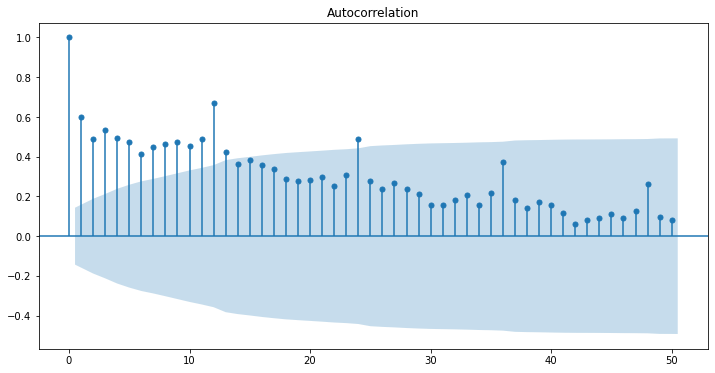

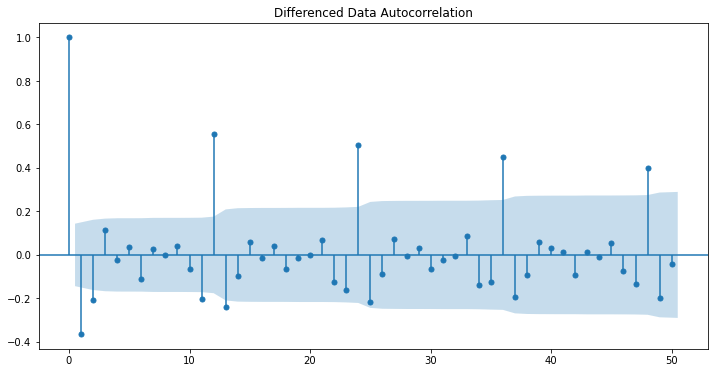

In [210]:
plot_acf(df['Rose'],lags=50)
plot_acf(df['Rose'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()

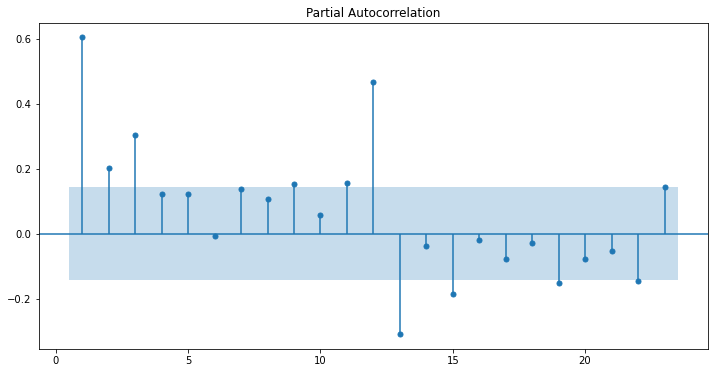

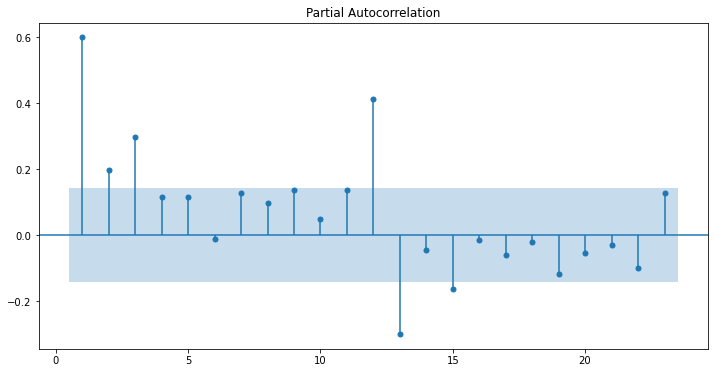

In [211]:
plot_pacf(df2,zero=False,alpha=0.05);
plot_pacf(df2,zero=False,alpha=0.05,method='ywmle');

**ACF AND PACF on training data only**

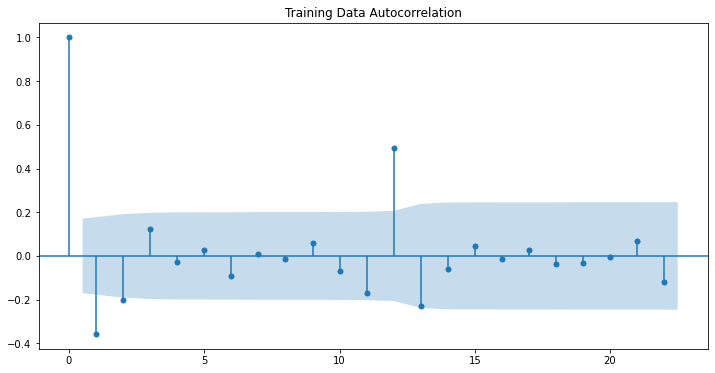

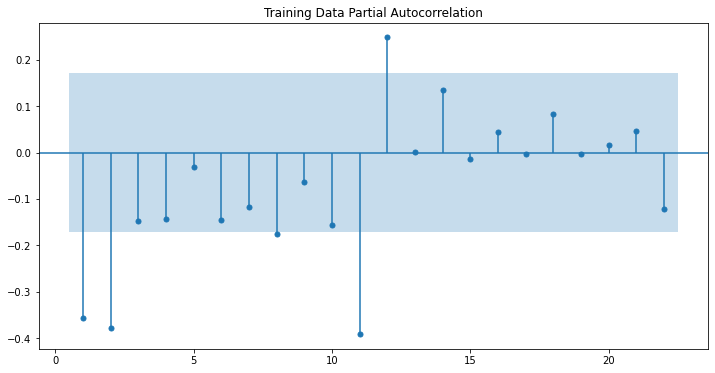

In [212]:
plot_acf(train.diff(),title='Training Data Autocorrelation',missing='drop')
plot_pacf(train.diff().dropna(),title='Training Data Partial Autocorrelation',zero=False,method='ywmle')
plt.show()

**Values of Q and P respectively form Autocorrelation and Partial Autocorrelation are Q=2, P=2**

In [213]:
manual_ARIMA = ARIMA(train['Rose'], order=(2,1,2),freq='MS')

results_manual_ARIMA = manual_ARIMA.fit()

print(results_manual_ARIMA.summary())

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                             ARIMA Model Results                              
Dep. Variable:                 D.Rose   No. Observations:                  131
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -633.649
Method:                       css-mle   S.D. of innovations             29.975
Date:                Sun, 20 Jun 2021   AIC                           1279.299
Time:                        04:04:04   BIC                           1296.550
Sample:                    02-01-1980   HQIC                          1286.309
                         - 12-01-1990                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.4911      0.081     -6.076      0.000      -0.649      -0.333
ar.L1.D.Rose    -0.4383      0.218     -2.015      0.044      -0.865      -0.012
ar.L2.D.Rose     0.0269      0.109      0.24

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [214]:
predicted_manual_ARIMA_CORR = results_manual_ARIMA.forecast(steps=len(test))
#prediction of test data


In [215]:
from sklearn.metrics import  mean_squared_error
rmse_corr = mean_squared_error(test['Rose'],predicted_manual_ARIMA_CORR[0],squared=False)
print(rmse_corr)

15.354873412846443


In [216]:
resultsDf_Coorelation = pd.DataFrame({'RMSE': [rmse_corr]}
                           ,index=['ARIMA(2,1,2)(ACF &PACF)'])
resultsDf = pd.concat([resultsDf, resultsDf_Coorelation])
resultsDf

,RMSE
"ARIMA(3,1,3)(AIC)",1.598644e+01
"ARIMA(2,1,2)(ACF &PACF)",1.535487e+01
"SARIMA(2,1,3)(0,0,3,12)(SARIMA AIC)",3.937978e+66
"ARIMA(2,1,2)(ACF &PACF)",1.535487e+01


**SARIMA using ACF & PACF**

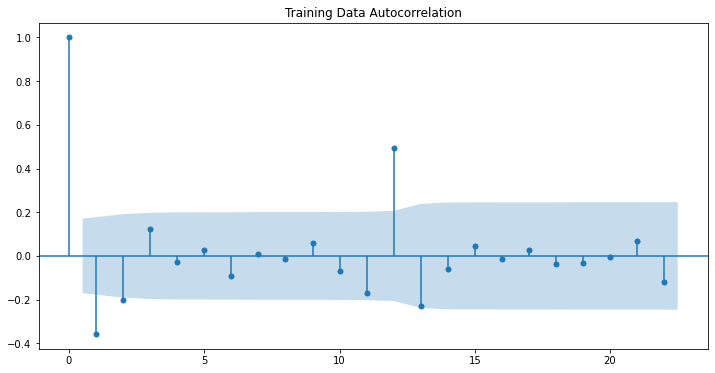

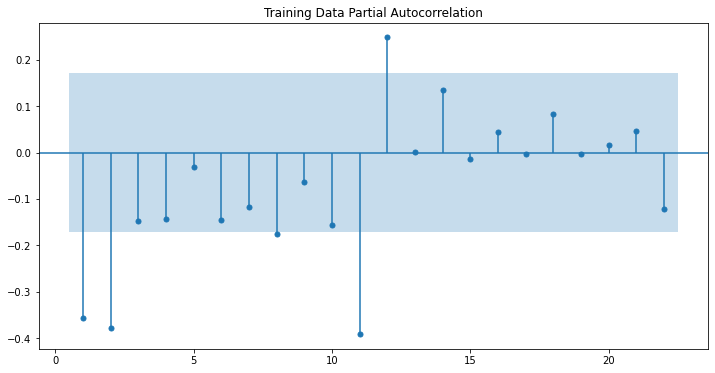

In [217]:
plot_acf(train.diff(),title='Training Data Autocorrelation',missing='drop')
plot_pacf(train.diff().dropna(),title='Training Data Partial Autocorrelation',zero=False,method='ywmle');

**Looking in seasonality, so value of Q =12, no seasonality (pattern) for P in Training Data Partial Autocorrelation so P=0, No Further Diffrentiation so D =0**

In [218]:
import statsmodels.api as sm

manual_SARIMA = sm.tsa.statespace.SARIMAX(train['Rose'],
                                order=(3,1,3),
                                seasonal_order=(0, 0, 3, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA = manual_SARIMA.fit(maxiter=1000)
print(results_manual_SARIMA.summary())

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                               Rose   No. Observations:                  132
Model:             SARIMAX(3, 1, 3)x(0, 0, 3, 12)   Log Likelihood                -383.493
Date:                            Sun, 20 Jun 2021   AIC                            786.986
Time:                                    04:12:16   BIC                            812.095
Sample:                                01-01-1980   HQIC                           797.116
                                     - 12-01-1990                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.4106      0.026    -55.192      0.000      -1.461      -1.361
ar.L2         -0.0776      0.035   

In [219]:
predicted_manual_SARIMA_ACF = results_manual_SARIMA.get_forecast(steps=len(test))

In [221]:
rmse = mean_squared_error(test['Rose'],predicted_manual_SARIMA_ACF.predicted_mean,squared=False)
print('RMSE:',rmse,)

RMSE: 5000631069257765.0


### Q8: Build a table (create a data frame) with all the models built along with their corresponding parameters and the respective RMSE values on the test data.

In [223]:
temp_resultsDf_SA_AIC = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['SARIMA(3,1,3)(0,0,3,12)(SARIMA AIC & PACF)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf_SA_AIC])

resultsDf

,RMSE
"ARIMA(3,1,3)(AIC)",1.598644e+01
"ARIMA(2,1,2)(ACF &PACF)",1.535487e+01
"SARIMA(2,1,3)(0,0,3,12)(SARIMA AIC)",3.937978e+66
"ARIMA(2,1,2)(ACF &PACF)",1.535487e+01
"SARIMA(3,1,3)(0,0,3,12)(SARIMA AIC & PACF)",5.000631e+15


## Q9: Based on the model-building exercise, build the most optimum model(s) on the complete data and predict 12 months into the future with appropriate confidence intervals/bands.

In [224]:
#Fititng this "SARIMA(3, 1, 3)(0, 0, 3, 12)"" model to intire data 

full_data_model = sm.tsa.statespace.SARIMAX(df['Rose'],
                                order=(0,1,1,),
                                seasonal_order=(1, 0, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_full_data_model = full_data_model.fit(maxiter=1000)
print(results_full_data_model.summary())

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


                                     SARIMAX Results                                      
Dep. Variable:                               Rose   No. Observations:                  187
Model:             SARIMAX(0, 1, 1)x(1, 0, 1, 12)   Log Likelihood                -741.076
Date:                            Sun, 20 Jun 2021   AIC                           1490.152
Time:                                    04:20:29   BIC                           1502.742
Sample:                                01-01-1980   HQIC                          1495.260
                                     - 07-01-1995                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -1.1119      0.052    -21.305      0.000      -1.214      -1.010
ar.S.L12       0.9117      0.018   

In [225]:
predicted_SARIMA_full_data = results_full_data_model.get_forecast(steps=12)

In [226]:
pred_full_manual_SARIMA_date = predicted_SARIMA_full_data.summary_frame(alpha=0.05)
pred_full_manual_SARIMA_date.head()

Rose,mean,mean_se,mean_ci_lower,mean_ci_upper
1995-08-01,49.780482,17.000156,16.460788,83.100175
1995-09-01,47.749843,17.085973,14.261952,81.237735
1995-10-01,46.616105,17.171360,12.960858,80.271353
1995-11-01,52.640036,17.256325,18.818260,86.461812
1995-12-01,69.670551,17.340875,35.683062,103.658041


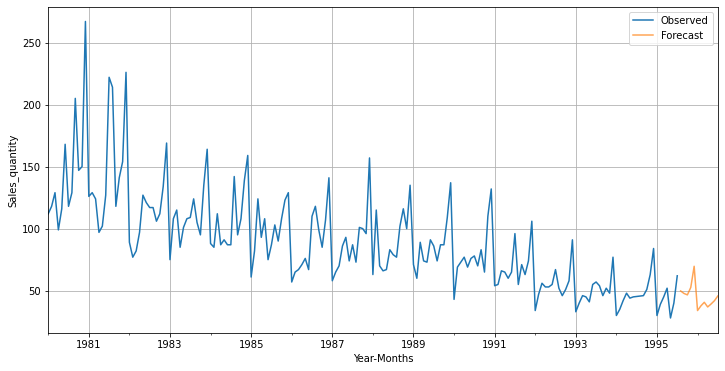

In [227]:
axis = df['Rose'].plot(label='Observed')
pred_full_manual_SARIMA_date['mean'].plot(ax=axis, label='Forecast', alpha=0.7)

axis.set_xlabel('Year-Months')
axis.set_ylabel('Sales_quantity')
plt.legend(loc='best')
plt.grid();

### Q10: Comment on the model thus built and report your findings and suggest the measures that the company should be taking for future sales. Please explain and summarise the various steps performed in this project. There should be proper business interpretation and actionable insights present.

**Please refer to the business report for a detailed answer**


This Rose data contains the 15 years of data of sales. Two data were missing from the data set, those were imputed using interpolation of Rose data. Once I dug the data it seems to have a strong seasonality in the last year every year. It shows in festive times the demand for wine increases all around. The trend of data shows a continuous decrease in sales than the seasonal increase in demand.
- Once predicting the future demand for the next 12 months, it is observed that demand will show very slight improvement and the seasonality factor is also reducing for the next 12 months.
- Once the sales data decomposed shows the trend of demand as decreasing over the years.
- Various exponential smoothing models development of this project contains the deep analysis of data:
- First data is converted into Time series index, and then EDA has provided the complete insight of data along with Decomposition of data on both additive and multiplicative basis. Additive analysis shows some trends in error terms so multiplicative decomposition is required here.
- Then different techniques of various exponential smoothing models are done training data and its effect is observed on the test data. The RMSE value of the different models is observed, and each model's RMSE value is enclosed here for better understanding. Double Exponential Smoothing follows the test data most accurately comparing the other models.
